In [13]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd

# Create a dataset

In [14]:
X, y = make_classification(n_samples = 500, n_features = 2, n_informative = 2, n_redundant = 0, n_classes = 2, random_state = 101)
X.shape

(500, 2)

In [15]:
np.unique(y)

array([0, 1])

# Performing a train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
X_train.shape

(400, 2)

# Applying GridSearch Cross Validation

In [18]:
model = LogisticRegression()

In [19]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [20]:
model = LogisticRegression()
params = {"fit_intercept": [True, False], "penalty" : ['l1', 'l2'],
          "max_iter": [100,1000,10000,100000, 1000000], "C": [0.2, 0.25, 0.5, 1, 2, 3, 4, 5],
          "tol" : [0.1, 0.01, 0.001, 0.0001],
           "solver" : ['saga', 'liblinear']}
LR_GS = GridSearchCV(model, param_grid = params, n_jobs = -1, cv = 5)
model_GSCV = LR_GS.fit(X_train,y_train)
model_GSCV.best_params_

{'C': 0.2,
 'fit_intercept': True,
 'max_iter': 100000,
 'penalty': 'l2',
 'solver': 'saga',
 'tol': 0.1}

In [21]:
y_pred_CV = model_GSCV.predict(X_test)

# Print Classification Report

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_CV))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        54
           1       0.87      0.87      0.87        46

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



# Calculate Accuracy, Precision, Recall, F1 Score

In [23]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [24]:
Accuracy = accuracy_score(y_test, y_pred_CV, normalize=True).round(3)
Precision = precision_score(y_test, y_pred_CV, average = 'macro').round(3)   # macro calculate the average value of classes.
Recall = recall_score(y_test, y_pred_CV, average = 'macro').round(3)
F1_Score = f1_score(y_test, y_pred_CV, average = 'macro').round(3)

print('Accuracy : ', Accuracy)
print(" ")
print('Precision : ', Precision)
print(" ")
print('Recall : ', Recall)
print(" ")
print('F1_Score : ', F1_Score)
print(" ")


Accuracy :  0.88
 
Precision :  0.879
 
Recall :  0.879
 
F1_Score :  0.879
 


In [25]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

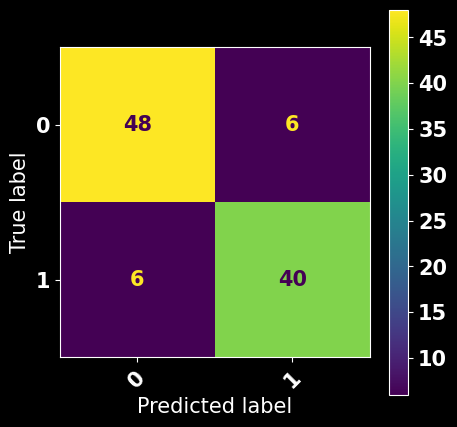

In [26]:
cm = confusion_matrix(y_test, y_pred_CV)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()

# Plot ROC Curve

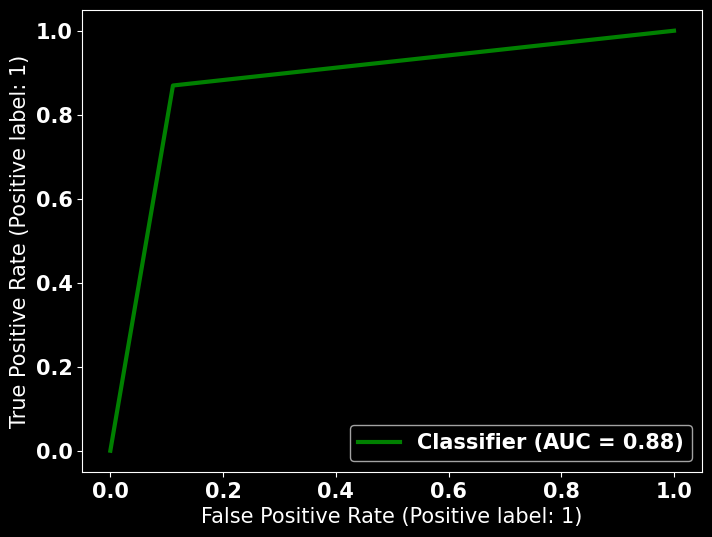

In [27]:
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(1,1,figsize=(8,6))
RocCurveDisplay.from_predictions(y_test, y_pred_CV, drop_intermediate = False, ax = ax, lw = 3, color ='g')
plt.show()